# Lesson: Decision Tree

<hr style="border:2px solid gray">

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
<br>
<br>
This is a bonus lesson. Students have not seen this dataset so it might be funner to run through this lesson then just go through what is in the curriculum.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
#bring in our csv
st_df = pd.read_csv('~/Downloads/space_titanic.csv')

In [3]:
#take a look at the data
st_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
#what kind of columns and dataframes are we dealing with?
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
#it looks like there are a few nulls- let's get rid of those 
st_df = st_df.dropna()

In [6]:
#create list of columns that we want to drop
columns_to_drop = ['Cabin', 'Name']

In [7]:
#drop those columns and save changes using inplace kwarg
st_df.drop(columns=columns_to_drop, inplace=True)

In [8]:
#create dummy columns for homeplanet and destination
dummies = pd.get_dummies(st_df[['HomePlanet', 'Destination']],drop_first=True)

In [9]:
#assign combined df to st_df
st_df = pd.concat([st_df, dummies], axis=1)

In [10]:
#make sure we have all the data
st_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1


<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
<br>
<br>
We can drop the original columns because we have created dummy columns that we can use to do machine learning
    </div>

In [11]:
#let's drop the original columns
st_df.drop(columns=['HomePlanet', 'Destination'], inplace=True)

In [12]:
st_df['Transported'] = np.where(st_df['Transported'] == True, 'True', 'False')

In [13]:
st_df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0,1
1,0002_01,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,0,0,1
2,0003_01,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1
3,0003_02,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,1
4,0004_01,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0,0,0,1


### Split Data

In [14]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [15]:
#split the data using our function above (stratify on our target variable)
train, validate, test = train_validate_test_split(st_df, 'Transported')

In [16]:
#take a look at the data
train.shape, validate.shape, test.shape

((3698, 14), (1586, 14), (1322, 14))

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
<br>
<br>
    We need to make sure that we pull out our 'target' because we <b>cannot</b> train our model with our target
</div>

<div class="alert alert-block alert-danger">
 <div class="row vertical-align">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
<b>Reminder:</b> We need to isololate our target variable before we train our model!
</div>

In [17]:
#pull our target out!
X_train = train.drop(columns=['Transported'])

In [18]:
#assign y
y_train = train['Transported']

In [19]:
#pull our target out!
X_val = validate.drop(columns=['Transported'])
#assign y
y_val = validate['Transported']

In [20]:
#pull our target out!
X_test = test.drop(columns=['Transported'])
#assign y
y_test = test['Transported']

In [22]:
seed=42
clf = DecisionTreeClassifier(max_depth=3, random_state=42)

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
<br>
<br>
clf = classifier
    <br>
    We have not yet trained our model! We have only created the Decision Tree Classifier
</div>

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
<br>
<br>
    We need to let our model know what the <u>features</u> and our <u>target</u> are
</div>

In [24]:
#model is making predictions to x_train set and comparing it to y_train
clf.score(X_train, y_train)

0.7690643591130341

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
<br>
<br>
Using .score = making predictions to x_train set and comparing it to y_train</div>

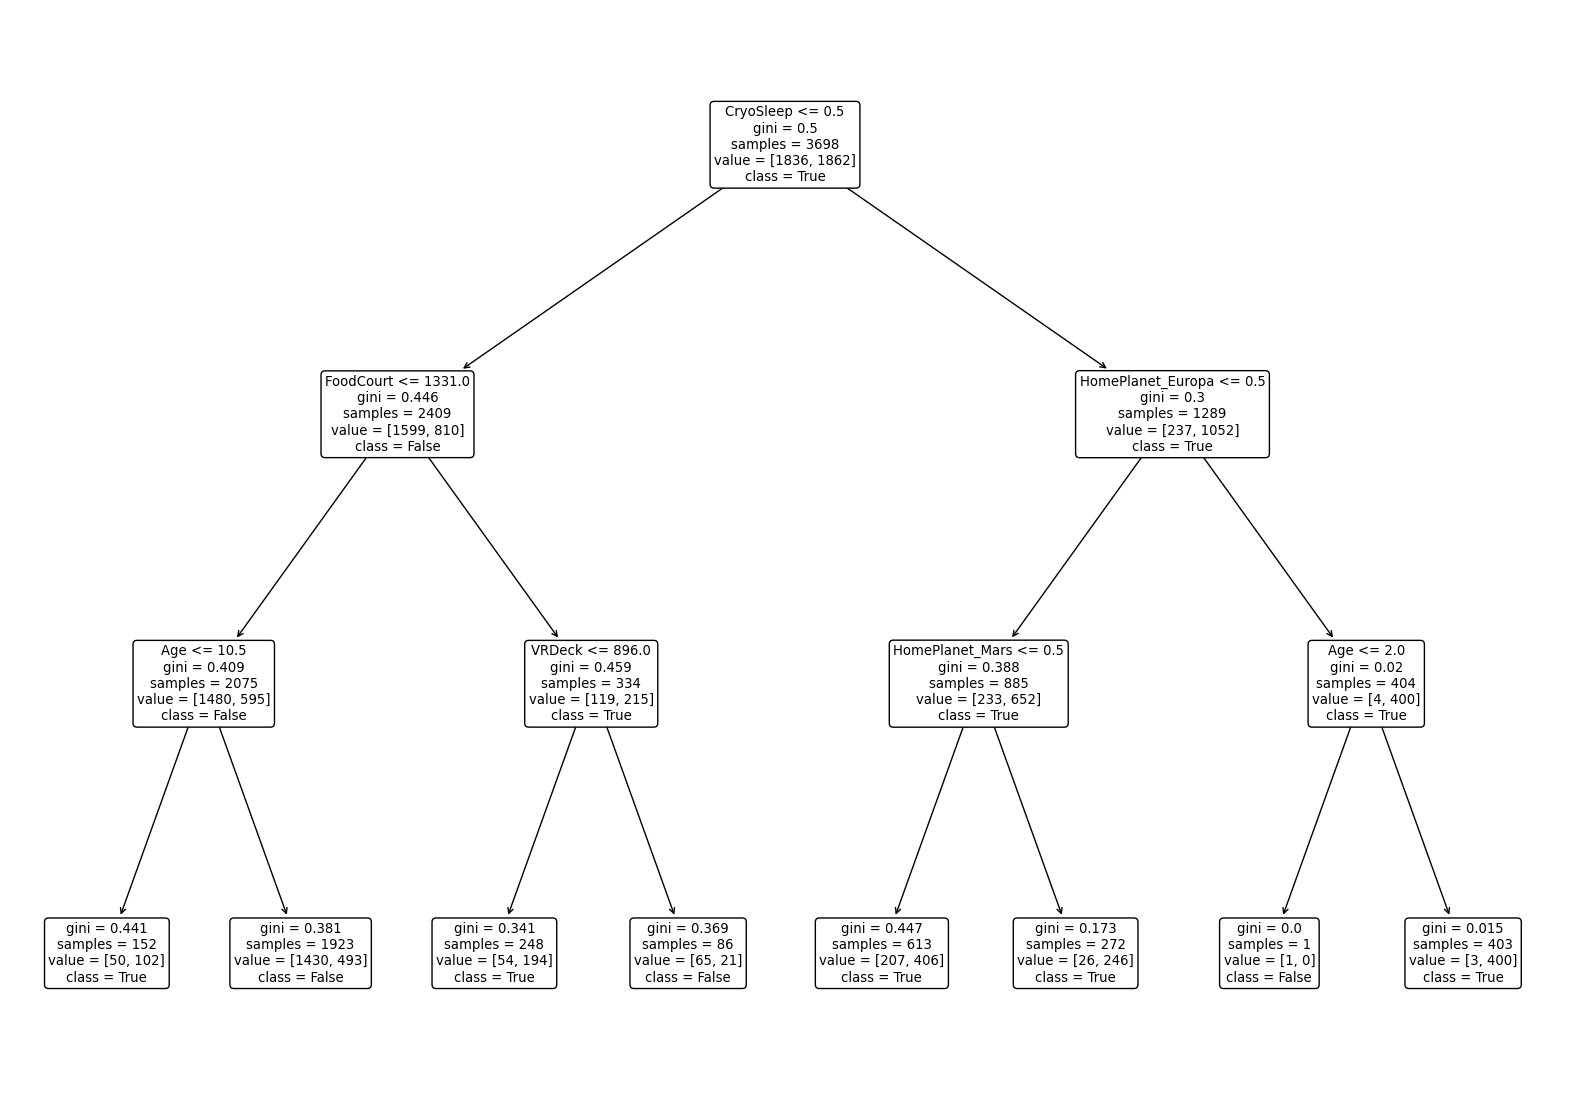

In [25]:
plt.figure(figsize=(20,14))

plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)

plt.show()

In [26]:
val_pred = clf.predict(X_val)

In [27]:
print(classification_report(y_val, val_pred))

              precision    recall  f1-score   support

       False       0.75      0.81      0.78       787
        True       0.80      0.74      0.77       799

    accuracy                           0.77      1586
   macro avg       0.78      0.78      0.77      1586
weighted avg       0.78      0.77      0.77      1586



<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
<br>
<br>
Your train score and validate score being similar are a good sign that your model is <b>not</b> overfit.
</div>

<div class="alert alert-block alert-danger">
 <div class="row vertical-align">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
<b>Warning:</b> 
     <br>
     This is an example of an overfit model. 
     <br>
     We change our depth to 10 (instead of 3)! 
     <br>
     Our train and validate scores are 10% different. 
</div>

In [28]:
seed = 42
big_clf= DecisionTreeClassifier(max_depth=10, random_state = 42)

In [29]:
big_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [30]:
big_clf.score(X_train, y_train)

0.8604651162790697

In [31]:
big_clf.score(X_val, y_val)

0.7868852459016393

<div class="alert alert-block alert-info">
<b>Instructor Note:</b>
<br>
<br>
<b>Sklearn Decision Tree Classifier Methods</b>
    <br>
    <br>
    -- <b>.score</b> : Returns the mean accuracy of given data and labels
    <br>
    -- <b>.fit</b> : Build a decision tree classifier from the training set (X,y)
    <br>
    -- <b>.predict</b> : predict class value of X
</div>